## Data Visualisation

### 1.Introduction

A company is interested in determining a sales strategy for the upcoming winter season.

For this, it was requested the analysis of a databasebased on board games.

Board game is an entertainment proposal that normally uses a board and some type of complement, such as dice, cards or chips. Following a series of rules and instructions, the participants have to reach some objective to obtain victory.

In each proposal, some intellectual or manual skill is used: a good memory, an adequate reasoning strategy or a certain speed in decision-making.

### 2. Methods and Results

#### 2.1 Business Understanding

In the present study, we want to better understand the dataset and, through the visualization of the data, understand which is the best strategy for the company.

#### 2.2 Data Understanding

Data understanding is the process of determining what the data is trying to tell us. In order to understand the data, we must first become familiar with it. This involves collecting and exploring the data. During the exploration phase, we will create summary statistics and visualizations in order to better understand the data. 

Once we have a good understanding of the data, we will be able to answer the questions that we need.

##### Characterisation of the data set

In this step we verify the the dataset size, feature type, number of features, number of observations,if there is missing values and duplicate observations.

Making a previous analysis of the dataset, I verified that the dataset have 10532 observations and 22 features, being 12 features object type and 9 features numeric type. There are missing values and no duplicates observations.

All analyzes are presented in the codes below.

In [1]:
import pandas as pd
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)
import plotly.express as px

In [2]:
df = pd.read_csv("data/board_games.csv")

In [3]:
df.head()

,game_id,description,image,max_players,max_playtime,min_age,min_players,min_playtime,name,playing_time,...,artist,category,compilation,designer,expansion,family,mechanic,publisher,average_rating,users_rated
0,1,Die Macher is a game about seven sequential po...,//cf.geekdo-images.com/images/pic159509.jpg,5,240,14,3,240,Die Macher,240,...,Marcus Gschwendtner,"Economic,Negotiation,Political",NaN,Karl-Heinz Schmiel,NaN,"Country: Germany,Valley Games Classic Line","Area Control / Area Influence,Auction/Bidding,...","Hans im Glück Verlags-GmbH,Moskito Spiele,Vall...",7.66508,4498
1,2,Dragonmaster is a trick-taking card game based...,//cf.geekdo-images.com/images/pic184174.jpg,4,30,12,3,30,Dragonmaster,30,...,Bob Pepper,"Card Game,Fantasy",NaN,"G. W. ""Jerry"" D'Arcey",NaN,Animals: Dragons,Trick-taking,"E.S. Lowe,Milton Bradley",6.60815,478
2,3,"Part of the Knizia tile-laying trilogy, Samura...",//cf.geekdo-images.com/images/pic3211873.jpg,4,60,10,2,30,Samurai,60,...,Franz Vohwinkel,"Abstract Strategy,Medieval",NaN,Reiner Knizia,NaN,"Asian Theme,Country: Japan,Knizia tile-laying ...","Area Control / Area Influence,Hand Management,...","999 Games,ABACUSSPIELE,Astrel Games,Ceilikan J...",7.44119,12019
3,4,When you see the triangular box and the luxuri...,//cf.geekdo-images.com/images/pic285299.jpg,4,60,12,2,60,Tal der Könige,60,...,NaN,Ancient,NaN,Christian Beierer,NaN,"Country: Egypt,Promotional Board Games","Action Point Allowance System,Area Control / A...",KOSMOS,6.60675,314
4,5,"In Acquire, each player strategically invests ...",//cf.geekdo-images.com/images/pic342163.jpg,6,90,12,3,90,Acquire,90,...,"Scott Okumura,Peter Whitley",Economic,NaN,Sid Sackson,NaN,3M Bookshelf Series,"Hand Management,Stock Holding,Tile Placement","3M,Avalon Hill,Avalon Hill (Hasbro),Dujardin,G...",7.35830,15195


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10532 entries, 0 to 10531
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   game_id         10532 non-null  int64  
 1   description     10532 non-null  object 
 2   image           10531 non-null  object 
 3   max_players     10532 non-null  int64  
 4   max_playtime    10532 non-null  int64  
 5   min_age         10532 non-null  int64  
 6   min_players     10532 non-null  int64  
 7   min_playtime    10532 non-null  int64  
 8   name            10532 non-null  object 
 9   playing_time    10532 non-null  int64  
 10  thumbnail       10531 non-null  object 
 11  year_published  10532 non-null  int64  
 12  artist          7759 non-null   object 
 13  category        10438 non-null  object 
 14  compilation     410 non-null    object 
 15  designer        10406 non-null  object 
 16  expansion       2752 non-null   object 
 17  family          7724 non-null  

In [5]:
# verify if there is missing values
df.isna().sum()

game_id               0
description           0
image                 1
max_players           0
max_playtime          0
min_age               0
min_players           0
min_playtime          0
name                  0
playing_time          0
thumbnail             1
year_published        0
artist             2773
category             94
compilation       10122
designer            126
expansion          7780
family             2808
mechanic            950
publisher             3
average_rating        0
users_rated           0
dtype: int64

In [6]:
# verify if the data set has duplicate rows
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows:", duplicate_rows_df.shape)

number of duplicate rows: (0, 22)


##### Cleaning Dataset

Cleaning Dataset is a process of eliminating invalid, missing values or uninformative data.

It represents an exercise to reach at higher quality data, assuming that, with it, it will be possible to achieve better results.

The dataset used in this study have some missing values in object features type. I decide to keep these observations and fill in the missing values by "Not mentioned".  

The outliers will be kept.

In [7]:
## Fill in missing values
df["mechanic"] = df["mechanic"].fillna("Not mentioned")
df["category"] = df["category"].fillna("Not mentioned")
df["family"] = df["family"].fillna("Not mentioned")
df["artist"] = df["artist"].fillna("Not mentioned")
df["designer"] = df["designer"].fillna("Not mentioned")
df["publisher"] = df["publisher"].fillna("Not mentioned")

#### 2.3 Exploratory Data Analysis - Data Visualisation

Data visualization is a combination of art and science. The challenge is to balance science without sacrificing art, and vice versa. A data visualization must, in the first place, accurately transmit the data. Not allowed to trick or misrepresent. If one number is two times more than another but they appear to be equal in the visualization, the visualisation is flawed. A data visualization must be both functional and aesthetically pleasing at the same time. The message of the visualization tends to be realized in strong visual presentations. The viewer will find it more difficult to examine the figure and correctly comprehend it if it has dissonant colours, unbalanced visual elements, or other disruptive elements (Wilke, C.O., 2019).

To a harmony in the visualization, it was chosen to present a similar font size for all graphics. As each type of graph has a different size, for each graph the size that best visually fits the size of the others was used.

The titles of the graphs were chosen in a way that best describes what the graphs are illustrating.

How the analysis is about board games, the chosen color to illustrate most graphs and table was the red, because red is utilized to energize the body, intellect, and circulatory system, and these features are linked to games.

- ##### The top 5 “average rated” games

In this step we want to identify the games that presents top 5 average rating.

To obtain this information, the "nlargest" function from the pandas library was used. This command aims to select the n largest values in a given column. In this case it was selected the five higherest values in the feature "average_rating"

To verify the games that presents the highest average rating, we only needed the name of the games and the average rating ordered from highest to lowest and select the first five, so in this step only the name and average_rating variables were kept.

At this stage, a table and a bar chart were used to illustrate only the games selected as the highest raiting, because as it is a matter of identifying the games with the highest rating, the table is the best option, as we have many games and to illustrate graphically it would be very polluted and it would be difficult to see and identify.

The five games with the highest average rating are "Small World Designer Edition", "Kingdom Death: Monster", "Terra Mystica: Big Box", "Last Chance for Victory" and "The Greatest Day: Sword, Juno and Gold Beaches", as we can see in the table and graph bellow.

In [8]:
df_top5 = df.nlargest(5, 'average_rating')[['name','average_rating']]
df_top5 = df_top5.set_index([pd.Index([1, 2, 3, 4, 5])])
df_top5.style.set_properties(**{'border': '1.3px solid black',
                          'color': 'black'}).background_gradient(cmap='Reds')

,name,average_rating
1,Small World Designer Edition,9.003920
2,Kingdom Death: Monster,8.931840
3,Terra Mystica: Big Box,8.848620
4,Last Chance for Victory,8.846030
5,"The Greatest Day: Sword, Juno, and Gold Beaches",8.830810


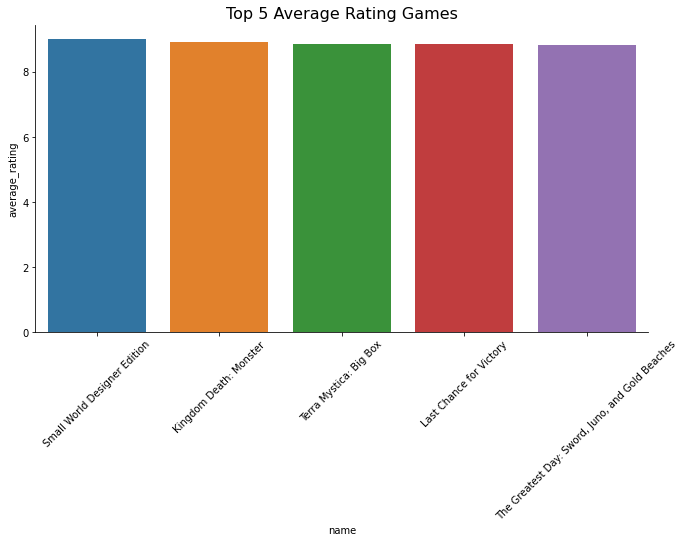

In [9]:
sns.catplot(x="name", y="average_rating", kind="bar", data=df_top5, aspect=2);
plt.title("Top 5 Average Rating Games", fontsize=16);
plt.xticks(rotation=45);

- ##### Correlation between the “users_rated” and the “max_playtime”

When comparing one quantitative variable to another, scatterplots are the standard visualization. A bubble chart, a type of scatterplot, can be produced if there are three quantitative variables, one of which can be mapped onto the dot size(Wilke, C.O., 2019).Therefore, in this step, the scatter plot was used to visualize if there is a correlation between the features “users_rated” and the “max_playtime”.

Additionally, a heatmap was made to illustrate the correlation matrix, with which we can numerically confirm whether there is a correlation between the analyzed features.

Analyzing the scatter plot we can verify that there is no correlation between the features e “users_rated” and the “max_playtime", because the points are randomly distributed. To prove it, the correlation table between the two features was also made, which presented the value -0.0043, confirming there is no correlation between the features “users_rated” and the “max_playtime".

For a better visualisation in the scatter plot use log in both features because the range was large, then the visualisation was not good.

In [10]:
fig = px.scatter(df, x="max_playtime", y="users_rated", 
width=600, height=400, log_x=True, log_y=True, color_discrete_sequence=['red'])
fig.update_layout(
                title_text="Users Rated x Maximum Playtime",
                title_font_color="black", title_font_size=18)

fig.show()

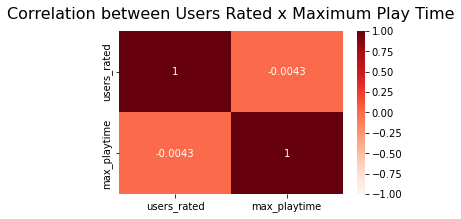

In [11]:
# heatmap to analyze correlation between features
df_corr = df[["users_rated", "max_playtime"]]
plt.figure(figsize=(5, 3))
c= df_corr.corr(method='pearson')
#mask = np.triu(np.ones_like(c, dtype=np.bool))

heatmap=sns.heatmap(c,cmap="Reds", vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation between Users Rated x Maximum Play Time', 
                  fontdict={'fontsize':16}, pad=12);


- ##### The distribution of game categories

Some games had more than one category, these categories were separated by a comma in the same feature. To consider the categories separately, it was necessary to manipulate the data in order to create a feature that presents the separate categories.
For this, only the features “game_id” and “category” was selected, in order to proceed with the analysis.

In this step it was used the “assign” function that returns a new object that includes new columns in addition to the existing columns, the “str.split” function to split the string at the specified delimiter (in this case comma) and “explode” that transform each item in a list-like structure into a row while maintaining the index values. This way we have the category separated in different rows.

To visualize the distribution of a categorical feature, the best known way is the bar chart, therefore, to visualize the distribution of the feature "category", which is a categorical feature, the bar bar was chosen.

The category games distribution is showing in the graph bellow.

We can verify that card games and war games are the games that presents the most frequency analysing the graph.

In [12]:
df_category = df[['game_id', 'category']].drop_duplicates()

In [13]:
df_category = df_category.assign(
    Category = df_category['category'].str.split(',')).explode('Category')

In [14]:
df_category.drop(["category"], axis=1, inplace=True)

C:\Users\vankr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



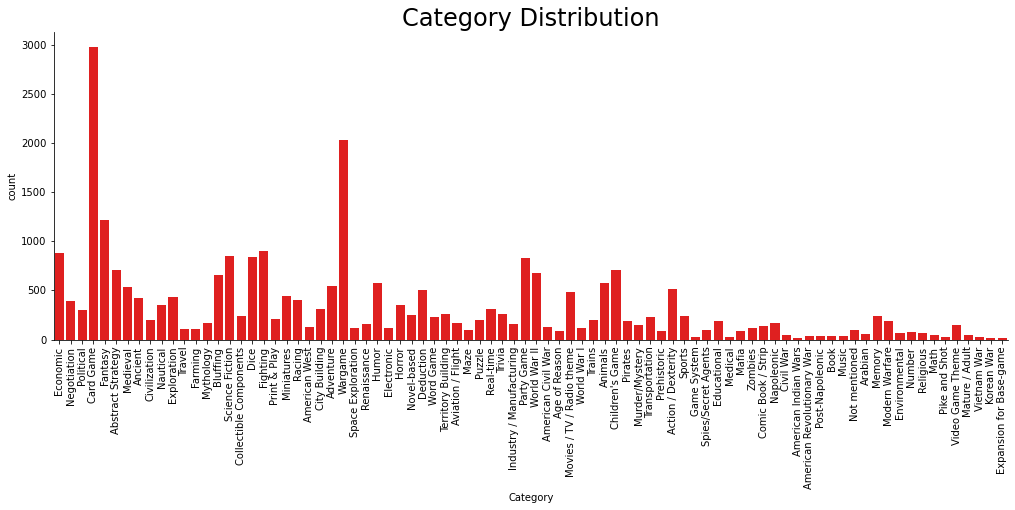

In [15]:
sns.catplot("Category", data=df_category, aspect=3, kind="count", color="red");
plt.title("Category Distribution", fontsize=24);
plt.xticks(rotation=90);

- ##### Do older games (1992 and earlier) have a higher MEAN “average rating” than newer games (after 1992)? 

How we to compare the average rating between older games and newer games in this step we will keep the features "average_rating" and "year_published".

In this step, we first need to identify older games and newer games. For this, we will classify as older games the games that have the year published equal to or less than 1992 and the newer games the games with the year published greater than 1992. Then the feature "game_age" was created.


After classify the games in older games and newer games, the mean of older games and newer games was calculated through the "groupby" and "mean" function from pandas library, with which we can calculate the mean "average rating" for each group.


Analyze whether older games (before and including 1992) have a higher mean average rating than the newer games.

Verifying the table bellow we can see that the mean “average rating” for newer game is higher than older game, but the mean “average rating” is close of older game average rating. 

The bar chart was chosen because it is easier compare two groups vizualiasing side-by-side bars. 

The box plot was chosen to compare how the "average rating" was distributed in both groups.

In the bar chart we can visualize the mean "average rating" and box plot we can vizualize the "average rating" distribution by older games and newer games. The mean "average rating" older games is not higher than newer games.

For a better analysis we perform a hypothesis test to verify if the older game mean “average rating” is higher than newer game.

The hypothesis are:

 H0: The older games (1992 and earlier) have a  MEAN “average rating” equal newer games
 
 H1: The older games (1992 and earlier) have a higher MEAN “average rating” than newer games
 
The test result is that "Fail to Reject NUll Hypothesis", it means that the older games do not have a hegher mean "average rating" than newer games.

In [16]:
df['game_age']=np.where(df["year_published"]<=1992,"older game","newer game")

In [17]:
df['older_game']=np.where(df["year_published"]<=1992,1,0)

In [18]:
df_mean = df.groupby(['game_age'], as_index=False)['average_rating'].mean()
df_mean.style.set_properties(**{'border': '1.3px solid black',
                          'color': 'black'})

,game_age,average_rating
0,newer game,6.446349
1,older game,6.035237


In [19]:
newer_game_average = df.loc[df["older_game"]==0]
newer_game_average = newer_game_average[["average_rating"]]
older_game_average = df.loc[df["older_game"]==1]
older_game_average = older_game_average[["average_rating"]]

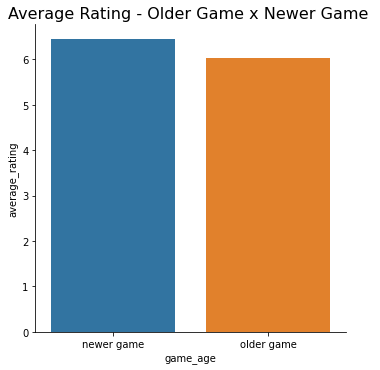

In [20]:
sns.catplot(x="game_age", y="average_rating", kind="bar", data=df_mean);
plt.title("Average Rating - Older Game x Newer Game ", fontsize=16);

In [21]:
fig = px.box(df, x="game_age", y="average_rating", color="game_age")
fig.update_layout(
                title_text="Average Rating - Older Game x Newer Game ",
                title_font_color="black", title_font_size=18)

fig.show()

In [22]:
from scipy.stats import ttest_ind

In [23]:
# H0: The older games (1992 and earlier) have a  MEAN “average rating” equal newer games
# H1: The older games (1992 and earlier) have a higher MEAN “average rating” than newer games
alpha =0.05
stat, p = ttest_ind(older_game_average, newer_game_average, alternative="greater")
print(f'T-statistic: {stat}')
print(f'P-value: {p}')
if(p <  alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject NUll Hypothesis")

T-statistic: [-19.55474432]
P-value: [1.]
Fail to Reject NUll Hypothesis


- #####  The 3 most common “mechanics” 

Some games had more than one mechanic, these mechanics were separated by a comma in the same feature. To consider the mechanics separately, it was necessary to manipulate the data to create a feature that presents the separate mechanics.

In this step it was used the “assign” function that returns a new object that includes new columns in addition to the existing columns, the “str.split” function to split the string at the specified delimiter (in this case comma) and “explode” that transform each item in a list-like structure into a row while maintaining the index values. This way we have the mechanic separated in different rows.
The features “game_id” and “mechanic” was selected, to proceed with the analysis.

How we want to identify the 3 more common mechanics, we need to calculate the frequency of each mechanic, then we can identify which mechanics presents the higher frequency. For this, the feature amount was created, where we each observation have the value equal 1.

After that, we need to sum the feature “amount” to calculate the frequency of each mechanic. Then the “pivot_table” was used to sum the feature “amount” for each mechanic.

Table and bar chart were chosen to visualize because as it is a matter of identifying the games with the highest rating, the table is the best option and the bar chart is the way to visualize the categorial feature distribution, then it is easier to identify which mechanic presents the higher frequency.

The 3 most common mechanics are "Dice Rolling", "Hand Management" and "Set Collection", as we can see in the table and graph below: 

In [24]:
df_mechanic = df[['game_id', 'mechanic']].drop_duplicates()

In [25]:
df_mechanic = df_mechanic.assign(
    Mechanic = df_mechanic['mechanic'].str.split(',')).explode('Mechanic')

In [26]:
df_mechanic.drop(["mechanic"], axis=1, inplace=True)

In [27]:
df_mechanic["amount"] = 1

In [28]:
df_mechanic_amount = pd.pivot_table(df_mechanic, values ='amount', index = ["Mechanic"],
                    aggfunc = np.sum)
df_mechanic_amount = df_mechanic_amount.reset_index()

In [29]:
df_top3 = df_mechanic_amount.nlargest(3, 'amount')[['Mechanic','amount']]
df_top3 = df_top3.set_index([pd.Index([1, 2, 3])])
df_top3.style.set_properties(**{'border': '1.3px solid black',
                          'color': 'black'}).background_gradient(cmap='Reds')

,Mechanic,amount
1,Dice Rolling,2438
2,Hand Management,2176
3,Set Collection,1347


In [30]:
df_mechanic_amount.sort_values(by=["amount"],inplace=True, ascending=False)

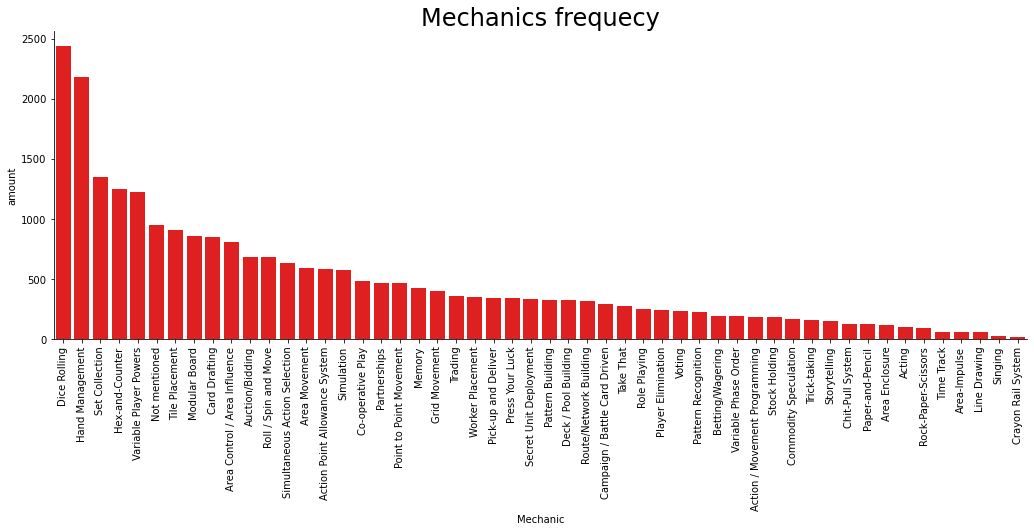

In [31]:
sns.catplot(x="Mechanic", y="amount", kind="bar", aspect=3, data=df_mechanic_amount, color="red");
plt.title("Mechanics frequecy", fontsize=24);
plt.xticks(rotation=90);

- ##### The most mechanics published in the last 15 years

As the company is interested in determining a sales strategy for the upcoming Winter season, verifying which mechanics have been most published in recent years could help to find board games that would have a great possibility of sales, given that it is believed that the publication of new games is linked to greater demand for similar features to existing games.

To select the last 15 years, observations with a publication date greater than and equal to 2001 were selected. Therefore, information from the year of publication between the years 2001 to 2016 was considered.

For this analysis it was considerate the features "mechanic" and "year_published".

How some games had more than one mechanic, these mechanics were separated by a comma in the same feature. To consider the mechanics separately, it was necessary to manipulate the data to create a feature that presents the separate mechanics.

It was used the “assign” function that returns a new object that includes new columns in addition to the existing columns, the “str.split” function to split the string at the specified delimiter (in this case comma) and “explode” that transform each item in a list-like structure into a row while maintaining the index values. This way we have the mechanic separated in different rows.
The features “game_id” and “mechanic” was selected, to proceed with the analysis.

As there are a lot of mechanics and a lot of years of publication, the heatmap was chosen to visualize this analysis. Although this visualization makes it more difficult to pinpoint the precise data values displayed, it performs a great job of displaying general trends (Wilke, C.O., 2019).

Analysing the heatmap we can identify that the "Hand Management" was the mechanic more common in the last years.

In the previous analysis, where all year published were considered, the "Dice Rolling" was the mechanic more common.

Maybe consider the recents years of publication will help to understand better the trends.

In [32]:
df_2001_2016 = df[df["year_published"].astype("int64")>=2001]

In [33]:
df_2001_2016 = df_2001_2016[['game_id', 'mechanic', 'year_published']].drop_duplicates()

In [34]:
df_2001_2016 = df_2001_2016.assign(Mechanic = df_2001_2016['mechanic'].str.split(',')).explode(
    'Mechanic')

In [35]:
df_2001_2016.drop(["mechanic"], axis=1, inplace=True)

In [36]:
import altair as alt

In [37]:
alt.data_transformers.disable_max_rows();

In [38]:
heatmap = alt.Chart(df_2001_2016, title="Mechanic by Year Published").mark_rect().encode(
                                     alt.X('Mechanic:O'), 
                                     alt.Y('year_published:O'),
                                     alt.Color('count()', scale=alt.Scale(scheme='reds'),
                                               legend=alt.Legend(
                                               title='Total Publish by year'))).properties(width=600) 

heatmap.configure_title(fontSize=18)

alt.Chart(...)

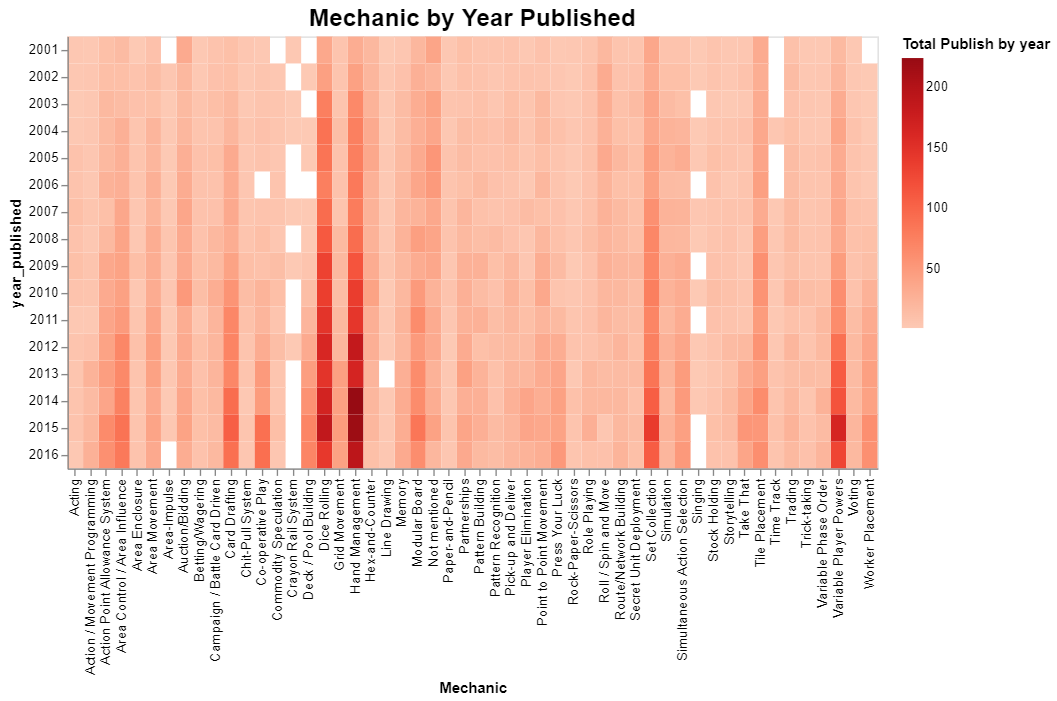

### 3.Conclusion

Identifying the games with the highest average rating helps to identify the possible games with the highest sales, but this would limit the games to sales.

When we analyze game categories and mechanics we can encompass more games including new games that may have been published and were not in the analyzed dataset.

Through the analysis we were able to identify that the older publications do not have the highest rating averages, so using the newer publications can identify the possible games that will have the highest sales.

The combination of category, mechanic and rating average identified in the most recent publications would be a good analysis to decide the sales strategy.